# Acronym vs Full-term Differences

In articles, authors will sometimes shorten long term to acronyms. However this can mean that different queries using the acronym or the full term can return different results.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import nilearn as nl
from nilearn.plotting import plot_stat_map, plot_glass_brain
import nibabel as nib
import neuroquery as nq

from pathlib import Path
import maml._constants as constants

## Load the Neuroquery Model

In [2]:
model = nq.NeuroQueryModel.from_data_dir(constants.NEUROQUERY_MODEL_DIR)

## Acronym vs Full Term Comparison

In [3]:
acronym_results = model("ASD")
full_text_results = model("Autism Spectrum Disorder")

## Differences in Similar Documents
Based on whether the acronym or the full term is used, the documents that are scored as the most similar change

In [4]:
acronym_results['similar_documents']

,pmid,title,pubmed_url,similarity
0,20656041,fMRI evidence of neural abnormalities in the s...,https://www.ncbi.nlm.nih.gov/pubmed/20656041,0.734954
1,17707658,Atypical neural substrates of Embedded Figures...,https://www.ncbi.nlm.nih.gov/pubmed/17707658,0.700331
2,21078973,Neural signatures of autism,https://www.ncbi.nlm.nih.gov/pubmed/21078973,0.672206
3,24497750,Atypical Neural Processing of Ironic and Since...,https://www.ncbi.nlm.nih.gov/pubmed/24497750,0.671073
4,19683584,Investigating the predictive value of whole-br...,https://www.ncbi.nlm.nih.gov/pubmed/19683584,0.654941
...,...,...,...,...
95,25352976,The role of mirroring and mentalizing networks...,https://www.ncbi.nlm.nih.gov/pubmed/25352976,0.437427
96,21692142,Brain Structure Anomalies in Autism Spectrum D...,https://www.ncbi.nlm.nih.gov/pubmed/21692142,0.436408
97,20655320,Association between amygdala response to emoti...,https://www.ncbi.nlm.nih.gov/pubmed/20655320,0.435353
98,26484047,Default mode network segregation and social de...,https://www.ncbi.nlm.nih.gov/pubmed/26484047,0.434623


In [5]:
full_text_results['similar_documents']

,pmid,title,pubmed_url,similarity
0,22791801,Fractionation of social brain circuits in auti...,https://www.ncbi.nlm.nih.gov/pubmed/22791801,0.607334
1,20381584,Regional Homogeneity of fMRI Time Series in Au...,https://www.ncbi.nlm.nih.gov/pubmed/20381584,0.516981
2,22101112,A systematic review and meta-analysis of the f...,https://www.ncbi.nlm.nih.gov/pubmed/22101112,0.516332
3,24419870,Autism Spectrum Disorder as Early Neurodevelop...,https://www.ncbi.nlm.nih.gov/pubmed/24419870,0.486376
4,26788282,The effect of gender on the neuroanatomy of ch...,https://www.ncbi.nlm.nih.gov/pubmed/26788282,0.477372
...,...,...,...,...
95,21890111,Multivariate searchlight classification of str...,https://www.ncbi.nlm.nih.gov/pubmed/21890111,0.225614
96,28619530,Neural networks underlying language and social...,https://www.ncbi.nlm.nih.gov/pubmed/28619530,0.223987
97,24133425,Abnormal functional connectivity during visuos...,https://www.ncbi.nlm.nih.gov/pubmed/24133425,0.223980
98,20943668,Decreased Interhemispheric Functional Connecti...,https://www.ncbi.nlm.nih.gov/pubmed/20943668,0.222968


## Similar Words

In [6]:
acronym_results['similar_words'].sort_values('weight_in_brain_map', ascending=False).head(10)

,similarity,weight_in_brain_map,weight_in_query,n_documents
fusiform,0.000335,0.172484,0.0,4278
motion,0.000407,0.166736,0.0,9061
occipital,0.000233,0.104983,0.0,6796
frontal,0.000337,0.073966,0.0,11471
superior,0.000483,0.070860,0.0,9978
cingulate,0.000154,0.070303,0.0,9501
face,0.000195,0.068161,0.0,4405
temporal,0.000186,0.063670,0.0,11897
fa,0.000197,0.060757,0.0,1796
gamma,0.000677,0.041453,0.0,1755


In [7]:
full_text_results['similar_words'].sort_values('weight_in_brain_map', ascending=False).head(10)

,similarity,weight_in_brain_map,weight_in_query,n_documents
reward,0.000865,0.203066,0.0,2823
motion,0.000424,0.173782,0.0,9061
occipital,0.000381,0.171976,0.0,6796
fusiform,0.000332,0.171353,0.0,4278
frontal,0.000421,0.092529,0.0,11471
cingulate,0.000193,0.088077,0.0,9501
superior,0.000600,0.088038,0.0,9978
temporal,0.000237,0.081347,0.0,11897
fa,0.000202,0.062050,0.0,1796
reho,0.001097,0.054983,0.0,260


In [8]:
def word_intersection(acronym_results, full_text_results, top_k):
    acronym_top_k = acronym_results['similar_words'].sort_values('weight_in_brain_map', ascending=False).head(top_k).index.tolist()
    full_text_top_k = full_text_results['similar_words'].sort_values('weight_in_brain_map', ascending=False).head(top_k).index.tolist()
    return len(set(acronym_top_k).intersection(full_text_top_k))

def word_rank_matches(acronym_results, full_text_results, top_k):
    same_rank = 0
    for i in range(top_k):
        if acronym_results['similar_words'].sort_values('weight_in_brain_map', ascending=False).head(i).index.tolist() == full_text_results['similar_words'].sort_values('weight_in_brain_map', ascending=False).head(i).index.tolist():
            same_rank += 1

    return same_rank


for k in [10, 50, 100]:
    print("Top k: {}".format(k))
    print("Word intersection: {}".format(word_intersection(acronym_results, full_text_results, k)))
    print("Word rank matches: {}".format(word_rank_matches(acronym_results, full_text_results, k)))
    print()

Top k: 10
Word intersection: 8
Word rank matches: 1

Top k: 50
Word intersection: 35
Word rank matches: 1

Top k: 100
Word intersection: 78
Word rank matches: 1



In [9]:
def word_differences(acronym_results, full_text_results):
    differences = (acronym_results['similar_words'] - full_text_results['similar_words'])
    differences = differences.sort_values('weight_in_brain_map', ascending=False)
    differences = differences['weight_in_brain_map'].dropna()
    return differences[differences != 0]
    
print("Word differences:\n{}".format(word_differences(acronym_results, full_text_results)))

Word differences:
face               0.023146
fusiform           0.001131
finger             0.000302
medial temporal    0.000167
memory             0.000102
                     ...   
parietal          -0.028787
thalamus          -0.029471
default           -0.033832
occipital         -0.066993
reward            -0.203061
Name: weight_in_brain_map, Length: 135, dtype: float64


## Brain Map Slices

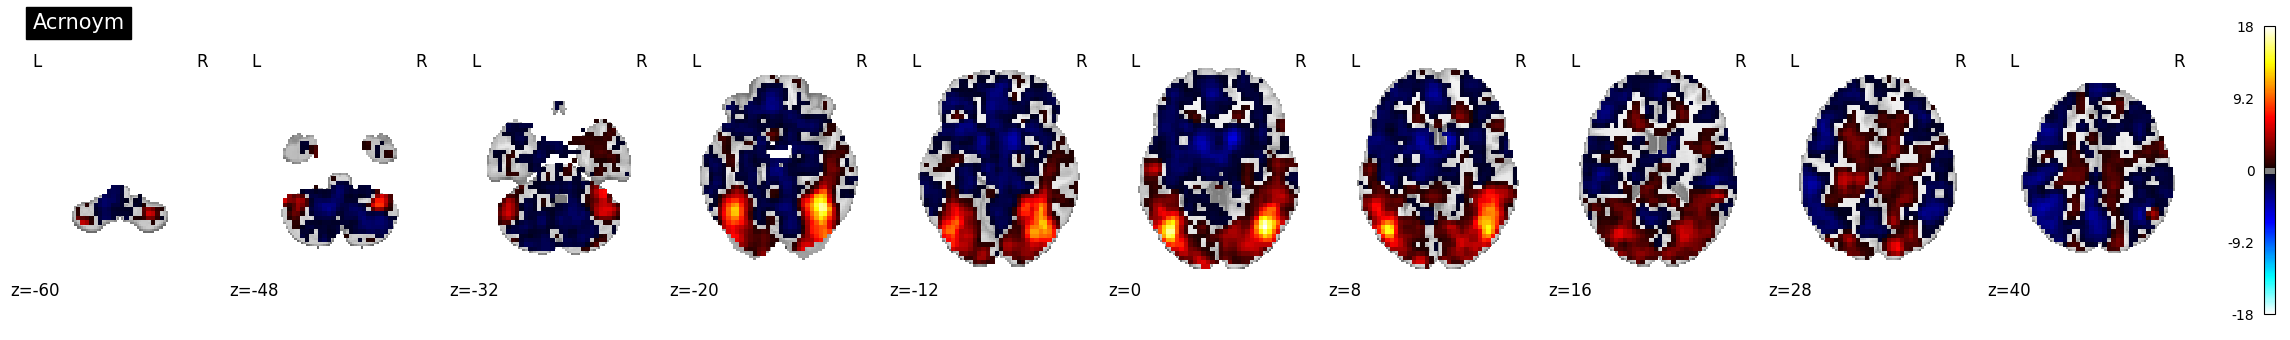

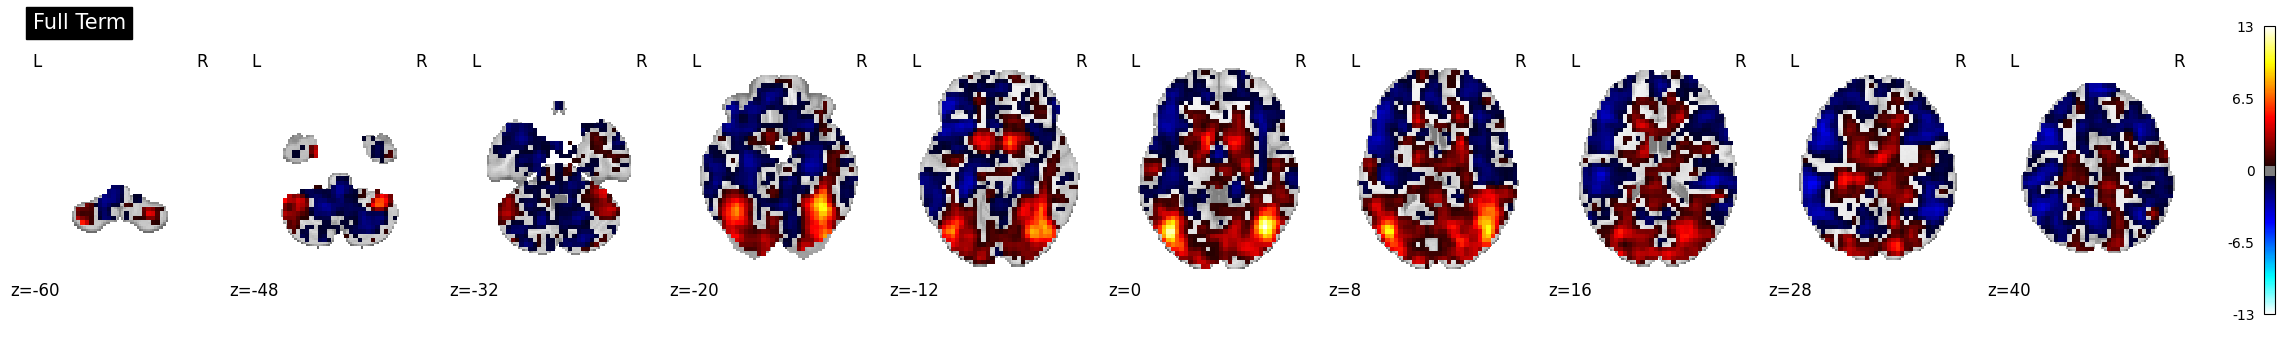

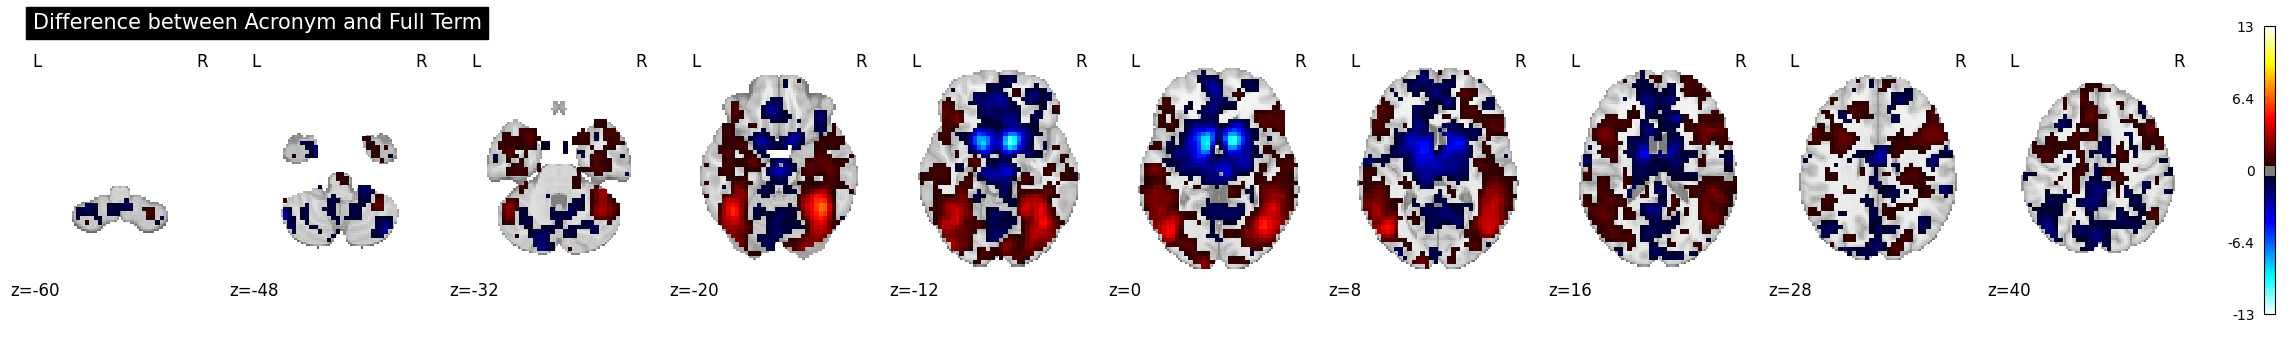

In [10]:
stat_map = plot_stat_map(
    acronym_results["brain_map"],
    threshold=0.5,
    display_mode="z",
    cut_coords=10,
    title="Acrnoym",
)

plot_stat_map(
    full_text_results["brain_map"],
    threshold=0.5,
    display_mode="z",
    cut_coords=stat_map.cut_coords,
    title="Full Term",
)

plot_stat_map(
    nib.Nifti1Image(
        acronym_results["brain_map"].get_fdata() - full_text_results["brain_map"].get_fdata(), 
        affine=acronym_results["brain_map"].affine
    ),
    threshold=0.5,
    display_mode="z",
    cut_coords=stat_map.cut_coords,
    title="Difference between Acronym and Full Term",
)

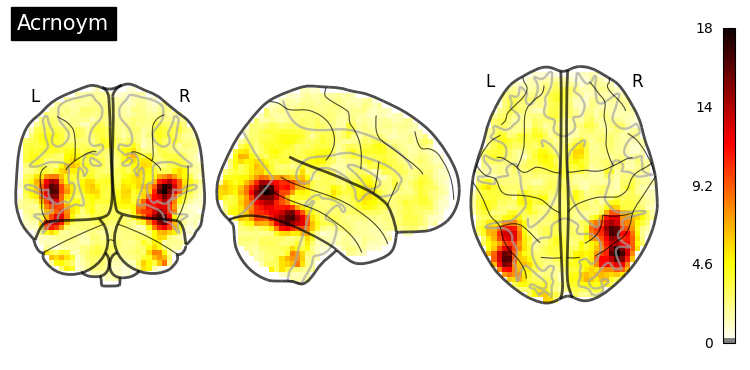

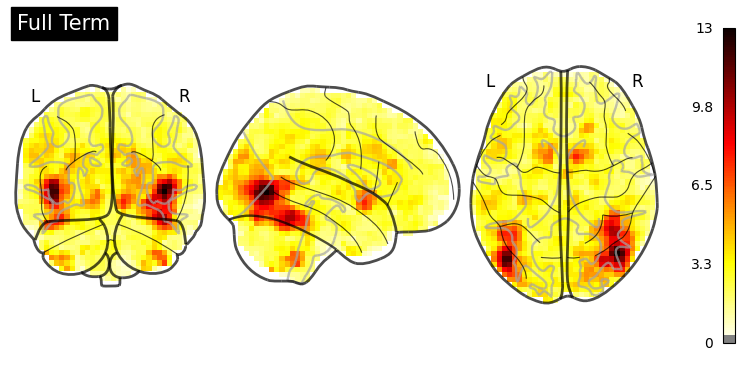

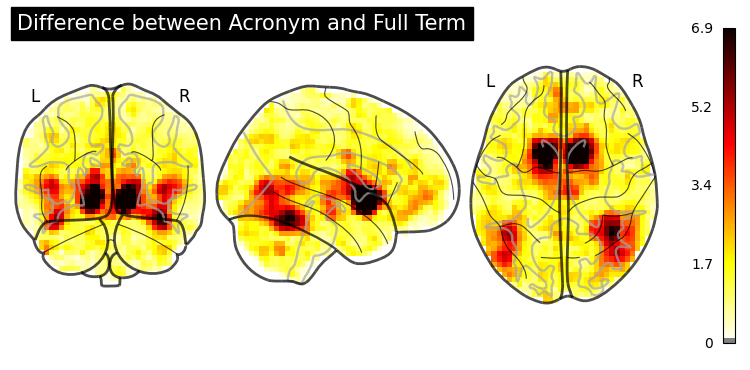

In [11]:

stat_map = plot_glass_brain(
    acronym_results["brain_map"],
    # threshold=0.5,
    colorbar=True,
    title="Acrnoym",
)

plot_glass_brain(
    full_text_results["brain_map"],
    colorbar=True,
    cut_coords=stat_map.cut_coords,
    title="Full Term",
)

plot_glass_brain(
    nib.Nifti1Image(
        acronym_results["brain_map"].get_fdata() - full_text_results["brain_map"].get_fdata(), 
        affine=acronym_results["brain_map"].affine
    ),
    colorbar=True,
    cut_coords=stat_map.cut_coords,
    title="Difference between Acronym and Full Term",
)


## Pearson Correlation

In [12]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(acronym_results["brain_map"].get_fdata().flatten(), full_text_results["brain_map"].get_fdata().flatten())
print("Pearson correlation: {:.2f}".format(correlation))
print("p-value: {:.2f}".format(p_value))


Pearson correlation: 0.85
p-value: 0.00


### By Region

In [13]:
from nilearn import datasets, image, input_data
from scipy.stats import pearsonr
import numpy as np

# Load the Harvard atlas
harvard_atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')

# Extract region labels and indices
region_labels = harvard_atlas.labels

# Calculate Pearson correlation maps by region
correlation_maps = {}
for region_index, region_label in enumerate(region_labels):
    acronym_image = nl.image.resample_img(acronym_results["brain_map"], target_affine=harvard_atlas.maps.affine).get_fdata()
    full_text_image = nl.image.resample_img(full_text_results["brain_map"], target_affine=harvard_atlas.maps.affine).get_fdata()
    mask = harvard_atlas.maps.get_fdata()

    acronym_region = acronym_image[mask == region_index]
    full_text_region = full_text_image[mask == region_index]
    
    # Calculate the Pearson correlation between the region's mask and the brain maps
    correlation, _ = pearsonr(acronym_region, full_text_region)

    # Store the correlation value
    correlation_maps[region_label] = correlation
    print(f"{region_label}: {correlation}")


/Users/andretelfer/anaconda3/envs/nilearn/lib/python3.10/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


Background: 0.7067450286275268
Frontal Pole: 0.7861568055823828
Insular Cortex: 0.6727177961646913
Superior Frontal Gyrus: 0.7918638741682154
Middle Frontal Gyrus: 0.867920187317751
Inferior Frontal Gyrus, pars triangularis: 0.9569916904570493
Inferior Frontal Gyrus, pars opercularis: 0.8459943798021479
Precentral Gyrus: 0.9016213101171645
Temporal Pole: 0.7951881395678109
Superior Temporal Gyrus, anterior division: 0.9096385605069408
Superior Temporal Gyrus, posterior division: 0.9327398981178189
Middle Temporal Gyrus, anterior division: 0.8894577988020761
Middle Temporal Gyrus, posterior division: 0.912104097663213
Middle Temporal Gyrus, temporooccipital part: 0.9813248234605183
Inferior Temporal Gyrus, anterior division: 0.8323694548991982
Inferior Temporal Gyrus, posterior division: 0.8896095941456713
Inferior Temporal Gyrus, temporooccipital part: 0.9560624775045953
Postcentral Gyrus: 0.8590544084304369
Superior Parietal Lobule: 0.9113669573806733
Supramarginal Gyrus, anterior div